<a href="https://colab.research.google.com/github/HasunFur/Machine-Learning/blob/main/Online_Sales_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Online Sales Dataset - Popular Marketplace Data**

About Dataset
This dataset provides a comprehensive overview of online sales transactions across different product categories. Each row represents a single transaction with detailed information such as the order ID, date, category, product name, quantity sold, unit price, total price, region, and payment method.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Online Sales Data.csv')
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [4]:
df.shape

(240, 9)

In [5]:
df.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [8]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [12]:
df[df['Unit Price'] >= 250.00].value_counts().sum()

59

In [13]:
df[df['Total Revenue'] >= 400.00].value_counts().sum()

53

<Axes: ylabel='Total Revenue'>

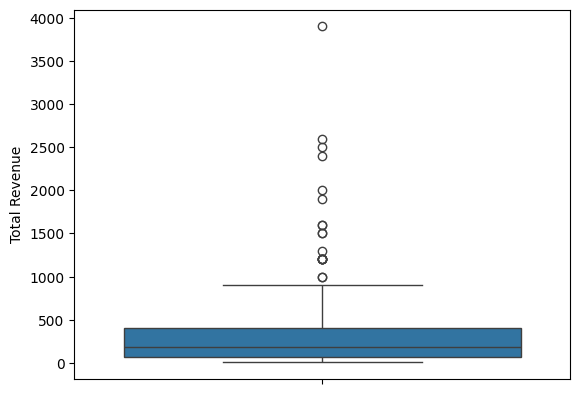

In [19]:
sns.boxplot(df['Total Revenue'])

In [28]:
def remove_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  iqr_range = IQR * 1.5
  lower_limit = Q1 - iqr_range
  upper_limit = Q3 + iqr_range
  return df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

In [34]:
df_cleaned = remove_outliers(df, 'Total Revenue')

<Axes: ylabel='Total Revenue'>

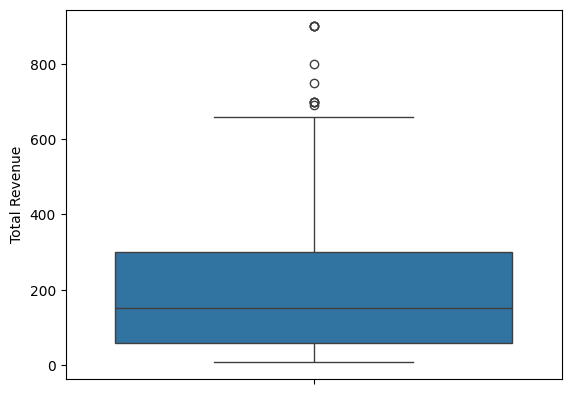

In [35]:
sns.boxplot(df_cleaned['Total Revenue'])

<Axes: ylabel='Unit Price'>

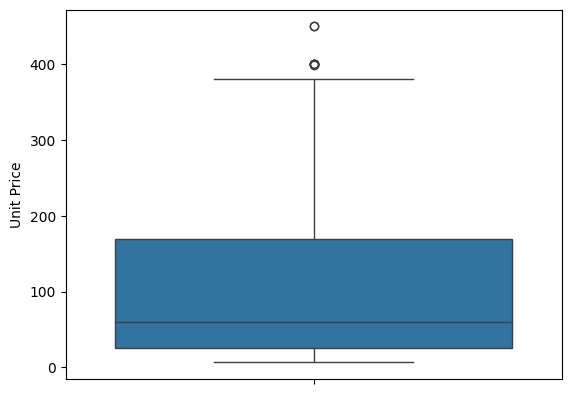

In [36]:
df_cleaned = remove_outliers(df_cleaned, 'Unit Price')
sns.boxplot(df_cleaned['Unit Price'])

<Axes: ylabel='Units Sold'>

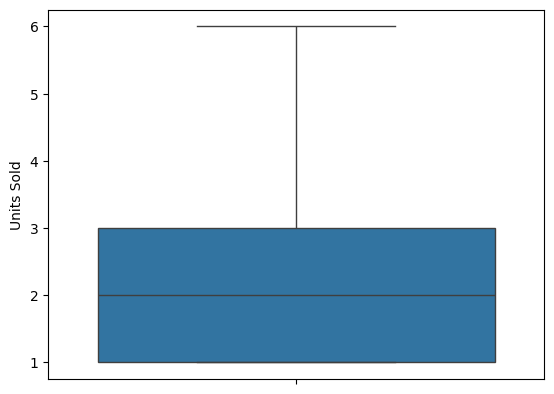

In [38]:
df_cleaned = remove_outliers(df_cleaned, 'Units Sold')
sns.boxplot(df_cleaned['Units Sold'])

In [42]:
df['Date'].head(5)

0    2024-01-01
1    2024-01-02
2    2024-01-03
3    2024-01-04
4    2024-01-05
Name: Date, dtype: object

In [45]:
df_cleaned['Date'] = pd.to_datetime(df['Date'])

In [46]:
df_cleaned['Date'].head(5)

2   2024-01-03
3   2024-01-04
4   2024-01-05
5   2024-01-06
8   2024-01-09
Name: Date, dtype: datetime64[ns]

In [55]:
import datetime


df_cleaned['Month'] = pd.to_datetime(df_cleaned['Date']).dt.strftime('%B')
print(df_cleaned[['Month', 'Date']])

       Month       Date
2    January 2024-01-03
3    January 2024-01-04
4    January 2024-01-05
5    January 2024-01-06
8    January 2024-01-09
..       ...        ...
235   August 2024-08-23
236   August 2024-08-24
237   August 2024-08-25
238   August 2024-08-26
239   August 2024-08-27

[205 rows x 2 columns]


<Axes: xlabel='Month', ylabel='Total Revenue'>

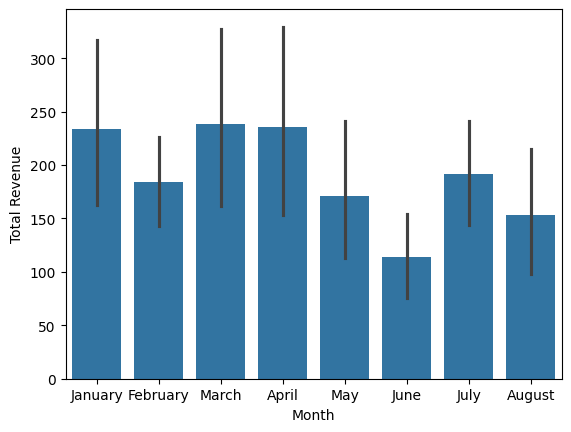

In [56]:
sns.barplot(x='Month', y='Total Revenue', data=df_cleaned)

<Axes: xlabel='Region', ylabel='Total Revenue'>

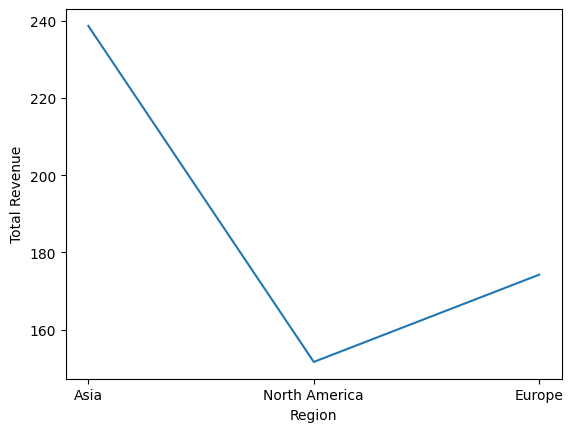

In [97]:
sns.lineplot(x='Region', y='Total Revenue', data=df_cleaned, ci=None)

<Axes: xlabel='Region', ylabel='Total Revenue'>

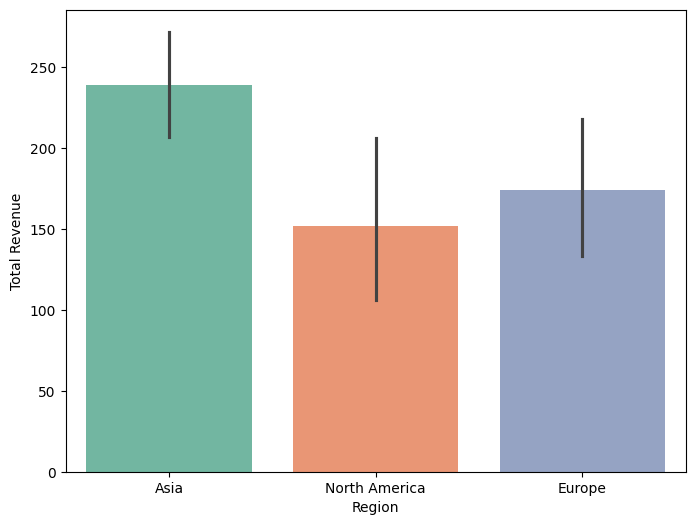

In [64]:
plt.figure(figsize=(8, 6), dpi = 100)
sns.barplot(x='Region', y='Total Revenue', data=df_cleaned, palette='Set2')

In [71]:
top_selling_categories = df.groupby('Product Category')['Total Revenue'].sum().sort_values(ascending=False)

print(top_selling_categories.head(7))

Product Category
Electronics        34982.41
Home Appliances    18646.16
Sports             14326.52
Clothing            8128.93
Beauty Products     2621.90
Books               1861.93
Name: Total Revenue, dtype: float64


In [84]:
best_HA_product = df[df['Product Category'] == 'Home Appliances'].sort_values(by='Units Sold', ascending=False).iloc[0]

print(f"The best-performing HA product is: {best_HA_product['Product Name']}")

best_electronics_product = df[df['Product Category'] == 'Electronics'].sort_values(by='Units Sold', ascending=False).iloc[0]

print(f"The best-performing electronics product is: {best_electronics_product['Product Name']}")

best_Clothing_product = df[df['Product Category'] == 'Clothing'].sort_values(by='Units Sold', ascending=False).iloc[0]

print(f"The best-performing Clothing product is: {best_Clothing_product['Product Name']}")

best_Books_product = df[df['Product Category'] == 'Books'].sort_values(by='Units Sold', ascending=False).iloc[0]

print(f"The best-performing Books product is: {best_Books_product['Product Name']}")

best_Beauty_Products_product = df[df['Product Category'] == 'Beauty Products'].sort_values(by='Units Sold', ascending=False).iloc[0]

print(f"The best-performing Beauty Products product is: {best_Beauty_Products_product['Product Name']}")

The best-performing HA product is: Instant Pot Duo
The best-performing electronics product is: Amazon Echo Dot (4th Gen)
The best-performing Clothing product is: Hanes ComfortSoft T-Shirt
The best-performing Books product is: The Da Vinci Code
The best-performing Beauty Products product is: CeraVe Hydrating Facial Cleanser


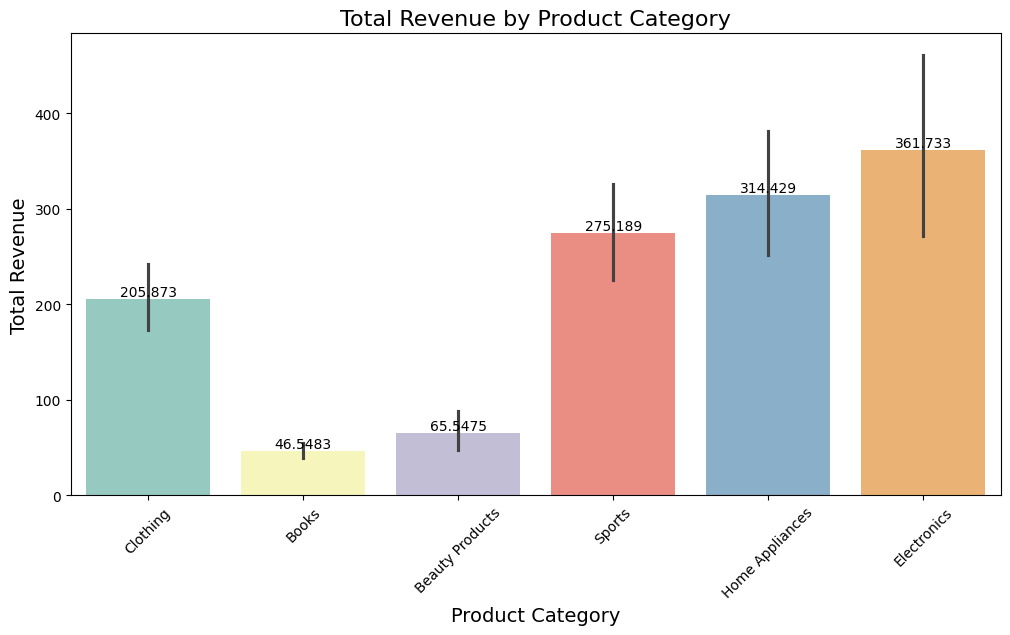

In [101]:
plt.figure(figsize=(12, 6), dpi=100)

plt.xticks(rotation=45)

sns.barplot(x='Product Category', y='Total Revenue', data=df_cleaned, palette='Set3')

ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')

plt.title('Total Revenue by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.show()

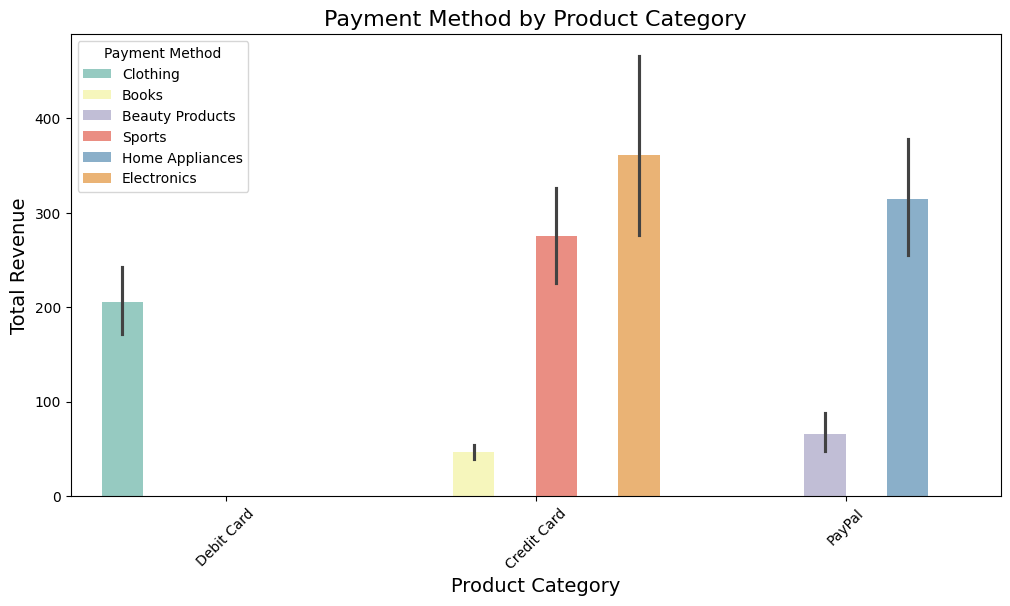

In [113]:

plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(x='Payment Method', y='Total Revenue', hue='Product Category', data=df_cleaned, palette='Set3')
plt.title('Payment Method by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Payment Method')
plt.show()


**Through rigorous data exploration, we uncovered valuable insights that will drive strategic decisions for your business:**

1. **Seasonal Sales Trends**: By analyzing sales over time, we identified seasonal patterns. These insights can guide inventory management, marketing campaigns, and resource allocation.
2. **Regional Popularity**: Exploring product categories across different regions revealed varying preferences. Understanding regional demand allows targeted marketing efforts and localized promotions.
3. **Payment Method Impact**: Investigating payment methods’ influence on sales volume or revenue highlighted opportunities for optimization. Tailoring payment options can enhance customer experience.
4. **Top-Selling Products**: Identifying best-performing products within each category enables inventory optimization. Focusing on these products maximizes revenue.
5. **Regional Performance**: Evaluating specific products or categories in different regions informs targeted marketing strategies. Customizing campaigns based on regional performance enhances effectiveness.